In [5]:
#최근접 이웃 알고리즘의 개요

#지도학습
from sklearn.neighbors import KNeighborsClassifier

X = [[0], [1], [2], [3]]  
y = [0, 0, 1, 1]

knn = KNeighborsClassifier(n_neighbors=3) #이웃의 수 3
knn.fit(X, y)

#1.1의 분류는?
print(knn.predict([[1.1]])) # 0으로 분류됨

#0.9는 0일 확률 66%, 1일 확률 33% => 0으로 분류됨
print(knn.predict_proba([[0.9]]))
print(knn.predict([[0.9]]))

[0]
[[0.66666667 0.33333333]]
[0]


In [6]:
#비지도학습
from sklearn.neighbors import NearestNeighbors

samples = [[0, 0, 0], [0, 0.5, 0], [1, 1, 0.2]]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(samples)

#새로운 데이터 1,1,1에 가장 가까운 데이터는?
print(nn.kneighbors([[1., 1., 1.]]))

# 세번째가 가장 가깝고 거리는 0.8

(array([[0.8]]), array([[2]], dtype=int64))


In [7]:
#최근접 이웃 회귀모형

from sklearn.neighbors import KNeighborsRegressor

X = [[40], [45], [60], [70]] #평방미터
y = [20, 22, 30, 35] #월세

neigh = KNeighborsRegressor(n_neighbors=2)
        # 회귀
neigh.fit(X, y)

# 65평방미터일 때의 월세는?

print(neigh.predict([[65]]))
print(neigh.predict(X))

[32.5]
[21.  21.  32.5 32.5]


(26, 2)


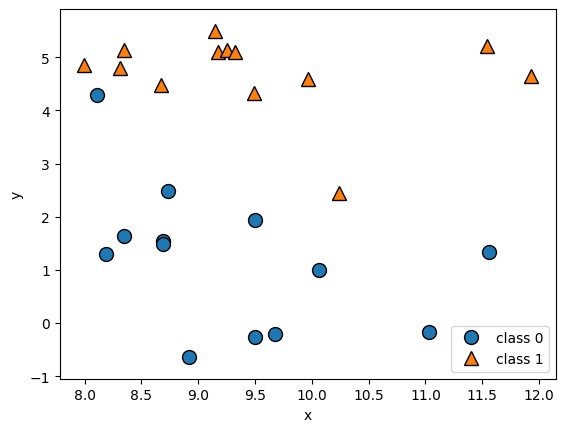

In [19]:
#forge 데이터셋(무작위 데이터셋)

from matplotlib import pyplot as plt
import mglearn

X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc=4) #범례위치
plt.xlabel("x")
plt.ylabel("y")

print(X.shape)

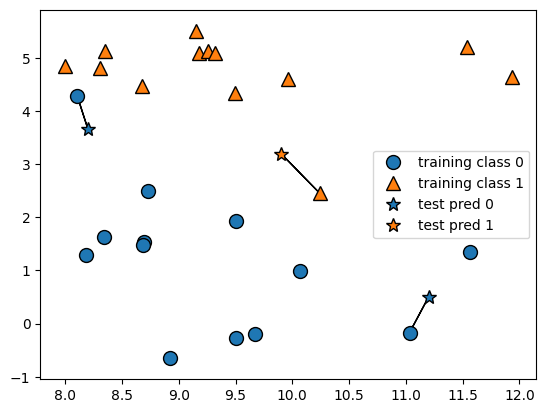

In [9]:
# 1개의 이웃

mglearn.plots.plot_knn_classification(n_neighbors=1)

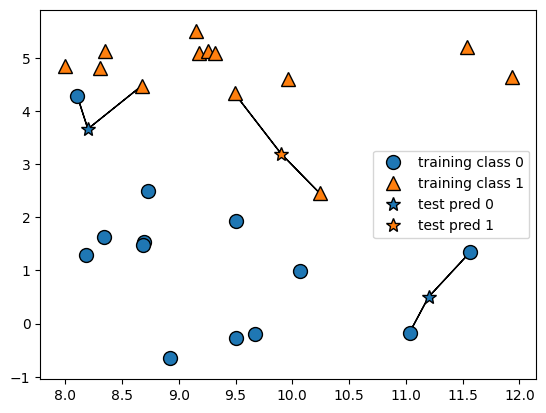

In [10]:
# 2개의 이웃

mglearn.plots.plot_knn_classification(n_neighbors=2)

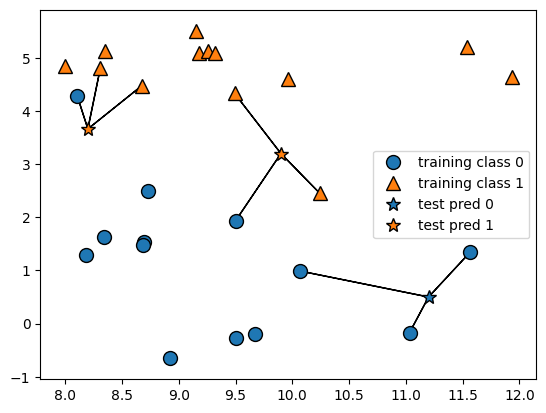

In [11]:
# 3개의 이웃

mglearn.plots.plot_knn_classification(n_neighbors=3)

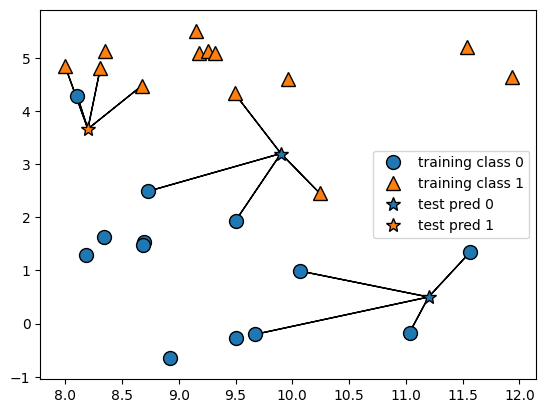

In [12]:
# 4개의 이웃

mglearn.plots.plot_knn_classification(n_neighbors=4)

In [13]:
from sklearn.model_selection import train_test_split

#데이터셋 분리

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
#3개의 이웃

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# 데이터 학습

knn.fit(X_train, y_train)

print(knn.predict(X_test))
print(knn.score(X_test, y_test))

[1 0 1 0 1 0]
0.8333333333333334


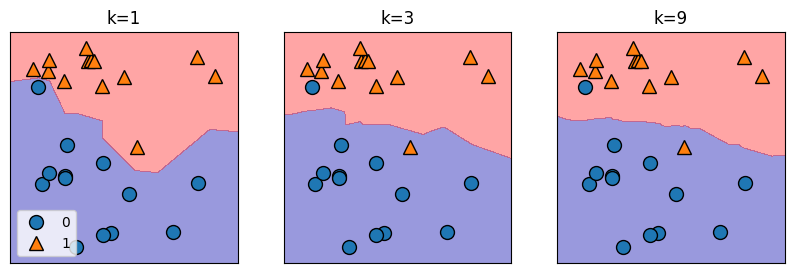

In [15]:
#1행 3열의 서브플롯

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n, ax in zip([1, 3, 9], axes):
    knn = KNeighborsClassifier(n_neighbors=n).fit(X, y)
    mglearn.plots.plot_2d_separator(knn, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'k={n}')

axes[0].legend(loc=3)

# k=1 : 학습용 데이터에 가깝게 따라감
# 이웃의 수를 늘릴수록 결정경계는 더 부드러워짐
# 이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 복잡도는 낮아진다.

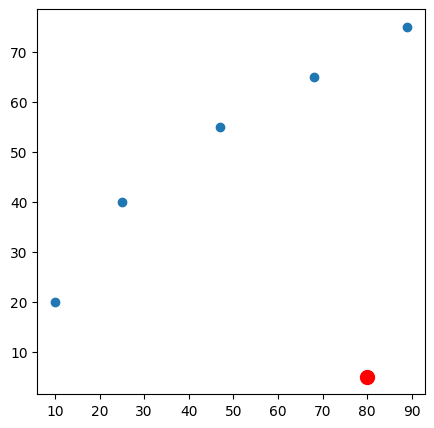

In [20]:
#유사도(거리) 계산 방법

import matplotlib.pyplot as plt

X=[10,25,47,68,89]
y=[20,40,55,65,75]

plt.figure(figsize=(5,5))
plt.scatter(X,y)

mypoint=(80,5)

plt.scatter(mypoint[0],mypoint[1],s=100,c='r')

#mypoint와 가장 가까운 포인트는?

In [22]:
#a,b의 유클리드 거리 구하기 (직접계산)

from math import sqrt
import numpy as np

def distance(p, m):
    items=[]
    for i in range(len(p-1)):
        d = sqrt((m[0] - p[i][0])**2 + (m[1] - p[i][1])**2)
        items.append(d)
    return items

points=np.array(list(zip(X,y)))
r=distance( points, mypoint )
print(r)
m=min(r)
i=np.argmin(r) #최소값의 인덱스
print('가장 가까운 포인트의 인덱스:',i)
print('가장 가까운 포인트는?',points[i])

[71.58910531638176, 65.19202405202648, 59.90826320300064, 61.18823416311342, 70.57619995437555]
가장 가까운 포인트의 인덱스: 2
가장 가까운 포인트는? [47 55]


In [24]:
#사이파이 패키지에 내장된 유클리드 거리 함수 (함수계산)

from scipy.spatial import distance

results=[]

for point in points:
    dist = distance.euclidean(point, mypoint)
    results.append(dist)

results 

[71.58910531638176,
 65.19202405202648,
 59.90826320300064,
 61.18823416311342,
 70.57619995437555]

In [25]:
#X,y의 맨해튼 거리 구하기

def distance(p, m):
    items=[]
    for i in range(len(p-1)):
        d = abs(m[0] - p[i][0]) + abs(m[1] - p[i][1])
        items.append(d)
    return items

r=distance( points, mypoint )
print(r)
m=min(r)
i=np.argmin(r)
print('가장 가까운 포인트의 인덱스:',i)
print('가장 가까운 포인트는?',points[i])

[85, 90, 83, 72, 79]
가장 가까운 포인트의 인덱스: 3
가장 가까운 포인트는? [68 65]


In [26]:
#사이파이 패키지에 내장된 맨해튼 거리를 구하는 함수

from scipy.spatial import distance
results=[]

for point in points:
    dist = distance.cityblock(point, mypoint)
    results.append(dist)

results 

[85, 90, 83, 72, 79]

In [1]:
# 오존량 예측
import pandas as pd

# csv 파일을 로딩

df = pd.read_csv("c:/data/ozone/ozone2.csv")

df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,1,190.000000,7.4,67,41,0
1,5,2,118.000000,8.0,72,36,0
2,5,3,149.000000,12.6,74,12,0
3,5,4,313.000000,11.5,62,18,0
4,5,5,185.931507,14.3,56,42,1


In [2]:
df["Result"].value_counts()

Result
1    81
0    72
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_9332\78854117.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=df, palette=colors)


<Axes: xlabel='Result', ylabel='count'>

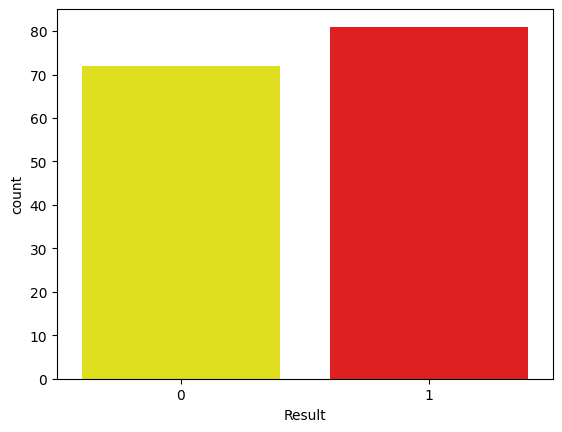

In [4]:
%matplotlib inline

import seaborn as sns

import matplotlib.pyplot as plt

colors = ["yellow", "red"]

sns.countplot(x='Result', data=df, palette=colors)

#불균형 데이터셋

In [5]:
cols=['Solar.R', 'Wind', 'Temp']

X = df[cols]

y = df['Result']

array([[<Axes: xlabel='Solar.R', ylabel='Solar.R'>,
        <Axes: xlabel='Wind', ylabel='Solar.R'>,
        <Axes: xlabel='Temp', ylabel='Solar.R'>],
       [<Axes: xlabel='Solar.R', ylabel='Wind'>,
        <Axes: xlabel='Wind', ylabel='Wind'>,
        <Axes: xlabel='Temp', ylabel='Wind'>],
       [<Axes: xlabel='Solar.R', ylabel='Temp'>,
        <Axes: xlabel='Wind', ylabel='Temp'>,
        <Axes: xlabel='Temp', ylabel='Temp'>]], dtype=object)

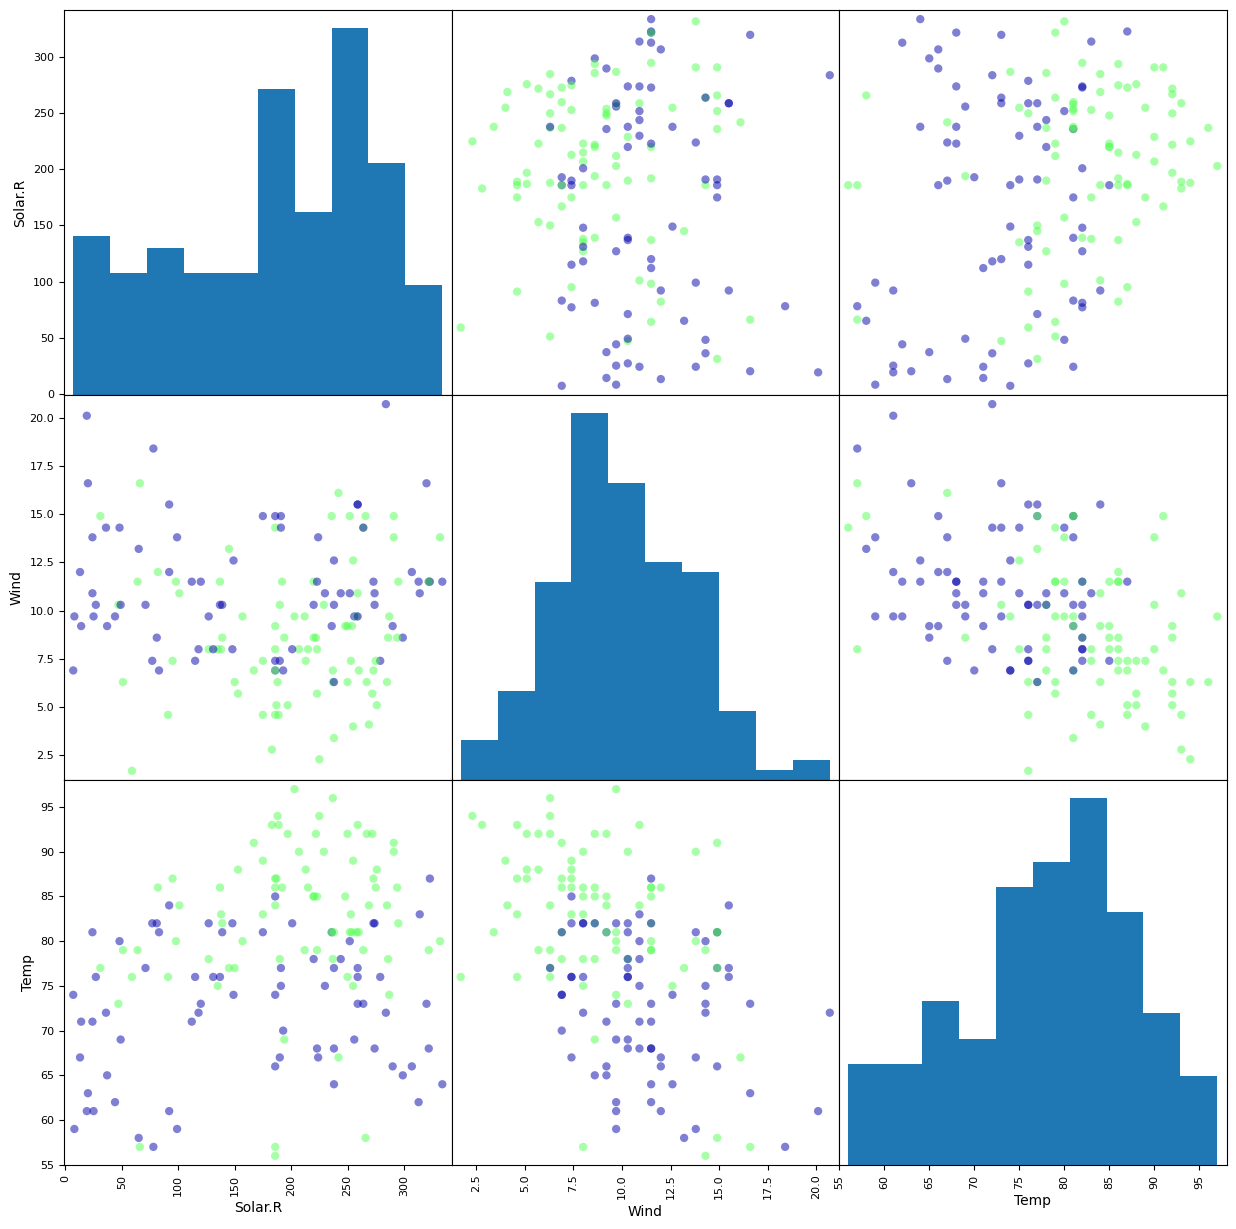

In [6]:
import mglearn

#산점도 행렬 출력

pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15),marker='o', cmap=mglearn.cm3)

In [7]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp.Result.value_counts()

Result
0    72
1    72
Name: count, dtype: int64

In [8]:
X = X_samp[cols]

y = y_samp['Result']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

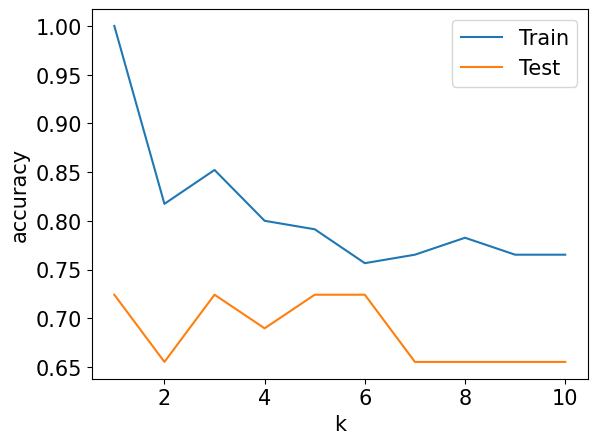

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

train_rate = []
test_rate = []

# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다.
# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함
# 1 에서 10 까지 n_neighbors 를 적용

neighbors = range(1, 11)

for n in neighbors:

    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    # 학습용 데이터셋의 정확도
    train_rate.append(knn.score(X_train, y_train))

    # 검증용 데이터셋의 정확도
    test_rate.append(knn.score(X_test, y_test))

plt.rcParams["font.size"]=15
plt.plot(neighbors, train_rate, label="Train")
plt.plot(neighbors, test_rate, label="Test")
plt.ylabel("accuracy")
plt.xlabel("k")
plt.legend()

In [11]:
import numpy as np 

max_rate=max(test_rate)

idx=np.argmax(test_rate)

print('최적의 k:',idx+1)

#학습용 데이터셋의 경우 이웃이 1개일 때 100% 예측

#이웃의 수가 늘어나면 학습용 데이터셋의 경우 모델이 단순해지고 정확도는 줄어든다.

최적의 k: 1


In [12]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

pred=model.predict(X_test)

print("학습용:",model.score(X_train, y_train))

print("검증용:",model.score(X_test, y_test))

학습용: 0.7913043478260869
검증용: 0.7241379310344828


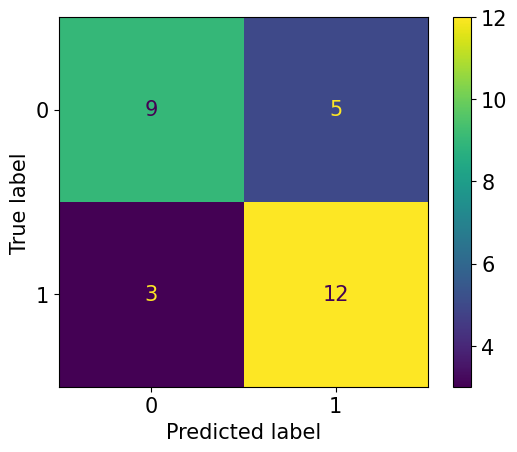

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred), display_labels=model.classes_).plot()

In [17]:
#변수선택
#기계학습 모형에 사용할 변수를 적절하게 선택하는 것이 모형의 성능에 큰 영향을 미치게 됨

import pandas as pd

df = pd.read_csv("c:/data/titanic/data.csv")
df.head()

,survived,sex,age,sibsp,parch,fare,adult_male,alone,pclass_1,pclass_2,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embarked_C,embarked_Q,embarked_S
0,0,1,22.0,1,0,7.2500,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,38.0,1,0,71.2833,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,1,35.0,0,0,8.0500,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [18]:
train_cols = df.columns[1:]

print(train_cols)

X = df[train_cols] # 독립변수
y = df["survived"] # 종속변수

print(df[train_cols].head())
print(y.head())

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone',
       'pclass_1', 'pclass_2', 'pclass_3', 'deck_A', 'deck_B', 'deck_C',
       'deck_D', 'deck_E', 'deck_F', 'deck_G', 'embarked_C', 'embarked_Q',
       'embarked_S'],
      dtype='object')
   sex   age  sibsp  parch     fare  adult_male  alone  pclass_1  pclass_2  \
0    1  22.0      1      0   7.2500           1      0         0         0   
1    0  38.0      1      0  71.2833           0      0         1         0   
2    0  26.0      0      0   7.9250           0      1         0         0   
3    0  35.0      1      0  53.1000           0      0         1         0   
4    1  35.0      0      0   8.0500           1      1         0         0   

   pclass_3  deck_A  deck_B  deck_C  deck_D  deck_E  deck_F  deck_G  \
0         1       0       0       1       0       0       0       0   
1         0       0       0       1       0       0       0       0   
2         1       0       0       1       0       0     

In [19]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['survived'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2["survived"].value_counts()

survived
0    342
1    342
Name: count, dtype: int64

In [20]:
X = X_samp[train_cols] # 독립변수
y = y_samp["survived"]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

<Axes: >

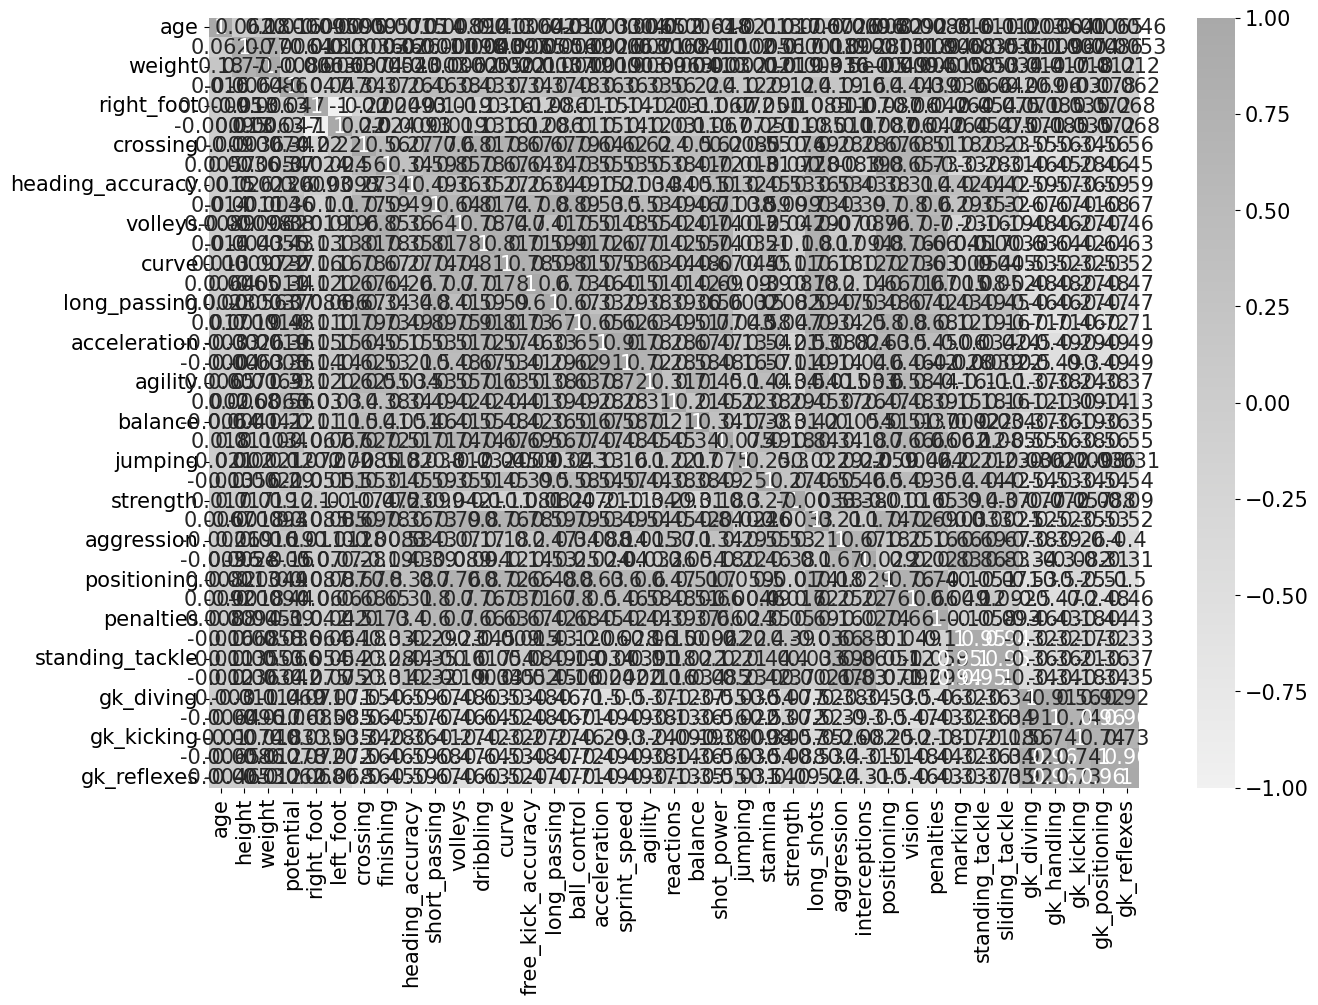

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(X.corr(), annot=True, cmap=cmap)

In [35]:
# 2개의 변수가 거의 유사함(다중공선성이 의심됨)

df[['sex','adult_male']].head(20)

KeyError: "None of [Index(['sex', 'adult_male'], dtype='object')] are in the [columns]"

In [36]:
#다중공선성이 높은 변수를 제거

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(

    X.values, i) for i in range(X.shape[1])]

vif["features"] = X.columns

vif

#VIF(Variance Inflation Factor) : 다른 변수에 의존적일수록 커진다.

# 성별(sex)과 성인남성여부(adult-male) 0.9

,VIF Factor,features
0,1.052960,age
1,2.462095,height
2,2.532863,weight
3,2.210423,potential
4,1062.008235,right_foot
5,312.344954,left_foot
6,4.913662,crossing
7,7.018586,finishing
8,3.765294,heading_accuracy
9,9.023533,short_passing


In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)

#변수의 coef_ 또는 feature_importances_ 수치가 높은 변수들을 기준으로 선택(후진제거법)

#로지스틱 회귀 모형, 의사결정나무 계열의 모형을 사용할 수 있음
rfe = RFE(model,n_features_to_select=15) #개수를 지정하지 않으면 변수 개수를 1/2로 감소시킴
fit = rfe.fit(X, y)

print("선택된 변수 개수: %d" % fit.n_features_)
print("변수 선택 여부: %s" % fit.support_)
print("변수 랭킹: %s" % fit.ranking_)
print('최종 선택 변수:',X.columns[fit.support_])

c:\python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


선택된 변수 개수: 15
변수 선택 여부: [False False False  True False  True False False  True  True False False
 False False False  True  True  True False  True False  True False False
 False  True  True False False False False  True False  True  True False
 False  True False]
변수 랭킹: [22 19 18  1 15  1 16 14  1  1 13 21  6  2  7  1  1  1 20  1 23  1  8  9
  5  1  1 17 12 11 24  1 25  1  1  3  4  1 10]
최종 선택 변수: Index(['potential', 'left_foot', 'heading_accuracy', 'short_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'reactions',
       'shot_power', 'long_shots', 'aggression', 'marking', 'sliding_tackle',
       'gk_diving', 'gk_positioning'],
      dtype='object')


In [38]:
#분산이 낮은 변수 제거
#어떤 특징이 일정하다면(즉 분산이 0이라면) 의미있는 패턴을 찾기 어렵다
#아래 자료에서 첫번째 필드는 1개를 제외하고 모두 0(1이 희소함)

X1 = [[0, 0, 1],
      [0, 1, 0],
      [1, 0, 0],
      [0, 1, 1],
      [0, 1, 0],
      [0, 1, 1]]

In [39]:
from sklearn.feature_selection import VarianceThreshold

#80% 이상 0인 필드를 제거
sel = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))    
sel.fit_transform(X1)

#첫번째 필드가 제거됨
#제거된 필드가 반드시 의미없는 필드라고 단정할 수는 없으므로 주의가 필요함

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [40]:
#분산에 의한 선택(범주형 변수의 경우 대부분 0이고 1이 희소하다면 분류에 도움이 되지 않을 가능성이 높음)
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(0.8 * (1 - 0.8))
X_train_sel = selector.fit_transform(X_train)
X_test_sel = selector.transform(X_test)
X_train_sel.shape

#필드가 20개에서 12개로 감소함

(8368, 39)

In [41]:
from sklearn.feature_selection import chi2, SelectKBest

#성능이 좋은 변수 선택, 카이제곱 검정 통계값 기준
#2개의 변수가 서로 독립인지 아닌지(상관관계가 없는지, 있는지)를 확인하고자 할 때 사용
#독립변수와 종속변수 간의 관계가 독립이라면 해당 변수는 모델링에 중요하지 않은 변수이므로 제거, 독립이 아니라면 모델링에 필요한 변수로 채택

selector1 = SelectKBest(chi2, k=15) #개수를 지정하지 않으면 50%로 감소
X_train1 = selector1.fit_transform(X_train, y_train)
X_test1 = selector1.transform(X_test)
X_train1.shape

(8368, 15)

In [42]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

#유의한 변수 선택, 개수 지정을 하지 않음

RFselector = SelectFromModel(estimator=RandomForestClassifier()).fit(X, y)
GBMselector = SelectFromModel(estimator=GradientBoostingClassifier()).fit(X, y)
LRselector = SelectFromModel(estimator=LogisticRegression(max_iter=1000)).fit(X, y)

c:\python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
columns = X.columns
columns

Index(['age', 'height', 'weight', 'potential', 'right_foot', 'left_foot',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [44]:
sel1=columns[RFselector.get_support()]
sel2=columns[LRselector.get_support()]
sel3=columns[GBMselector.get_support()]

print(sel1)
print(sel2)
print(sel3)
print(list(set(sel1) & set(sel2) & set(sel3))) #교집합

Index(['potential', 'crossing', 'short_passing', 'dribbling', 'ball_control',
       'reactions', 'shot_power', 'interceptions', 'positioning', 'vision',
       'marking', 'standing_tackle'],
      dtype='object')
Index(['right_foot', 'left_foot'], dtype='object')
Index(['potential', 'ball_control', 'reactions', 'shot_power', 'marking',
       'standing_tackle', 'gk_diving'],
      dtype='object')
[]


In [ ]:
#최근접 이웃 회귀모형(난방효율성 데이터셋)

#난방효율성 데이터
#18가지의 건축 특성을 지닌 12가지의 건축 속성, 총 768채의 주택 조사
# X1 : 상대적 크기
# X2 : 건축 표면적
# X3 : 벽체 면적
# X4 : 지붕 면적
# X5 : 전체 높이
# X6 : 건물의 방위
# X7 : 유리창 면적
# X8 : 유리창 면적의 분산
# Y1 : 난방 하중
# Y2 : 냉방 하중

In [45]:
import pandas as pd

df = pd.read_csv("c:/data/energy/ENB2012_data.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [46]:
train_cols = df.columns[0:8]

print(train_cols)

X = df[train_cols] # 독립변수

y = df["Y1"] # 난방 하중

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')


In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

<Axes: >

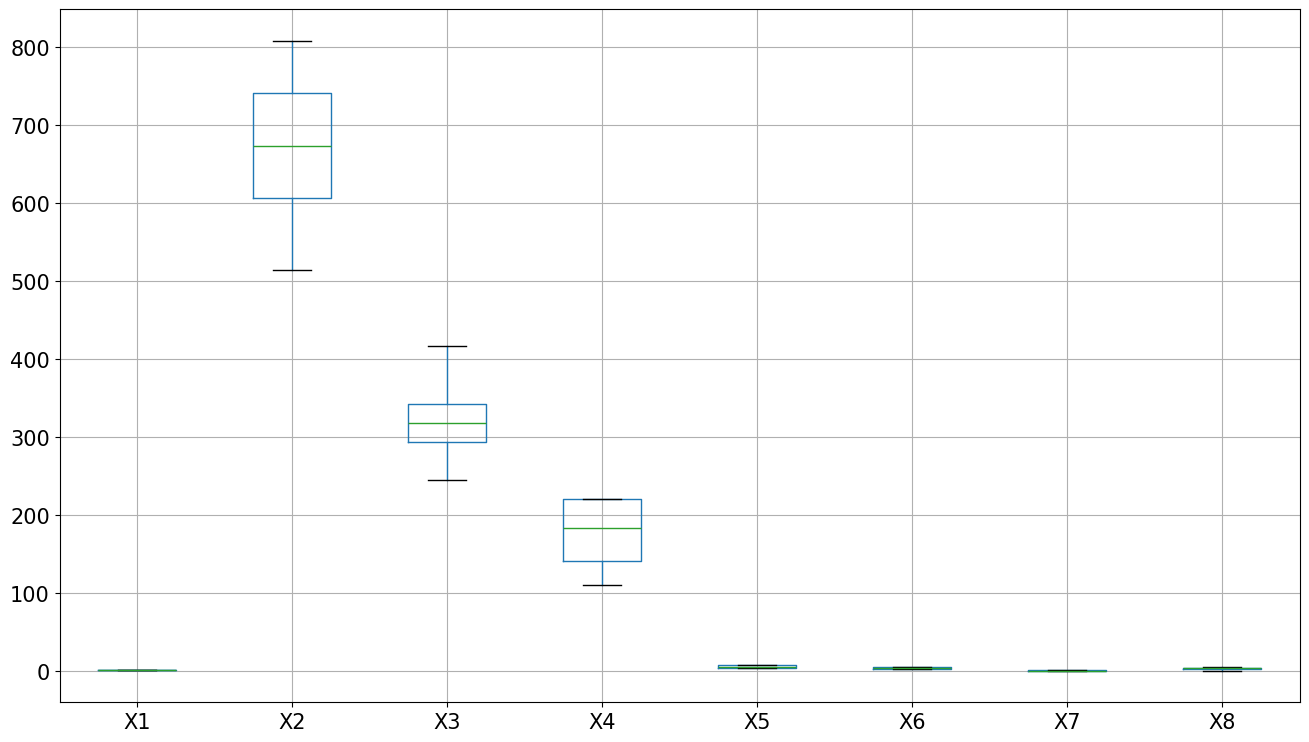

In [48]:
X.boxplot()

In [49]:
#Standardization 표준화, 평균 0, 표준편차 1
# 데이터를 0을 중심으로 양쪽으로 분포시키는 방법

# 평균을 기준으로 얼마나 떨어져 있는지를 나타내는 값

# (측정값-평균) / 표준편차
# k-means, svm 등 거리 기반의 모델에서 주로 사용함
# 변수의 단위가 다른 경우 가중치가 부여되어 노이즈가 생길 수 있다
# 1000원과 1달러(가중치가 1000배가 되지 않도록 해야 함
# 학습용 데이터셋의 변수들의 평균값 계산

mean_on_train = X_train.mean(axis=0)

# 학습용 데이터셋의 변수들의 표준편차값 계산
std_on_train = X_train.std(axis=0)

# 값에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train

# 검증용 데이터셋에도 같은 계산 적용

X_test_scaled = (X_test - mean_on_train) / std_on_train

print(X_train_scaled.describe())
print(X_test_scaled.describe())

                 X1            X2            X3            X4            X5  \
count  5.760000e+02  5.760000e+02  5.760000e+02  5.760000e+02  5.760000e+02   
mean  -4.317534e-16 -1.295260e-16  4.471732e-16  2.898916e-16  9.251859e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.346764e+00 -1.817237e+00 -1.712958e+00 -1.498746e+00 -9.751352e-01   
25%   -9.654262e-01 -7.719025e-01 -5.749374e-01 -6.825365e-01 -9.751352e-01   
50%   -2.027511e-01  1.340545e-01 -5.927190e-03  9.498830e-01 -9.751352e-01   
75%    6.552584e-01  9.703225e-01  5.630831e-01  9.498830e-01  1.023718e+00   
max    2.085274e+00  1.527835e+00  2.270114e+00  9.498830e-01  1.023718e+00   

                 X6            X7            X8  
count  5.760000e+02  5.760000e+02  5.760000e+02  
mean   1.757853e-16  2.390063e-16  6.784696e-17  
std    1.000000e+00  1.000000e+00  1.000000e+00  
min   -1.329847e+00 -1.775710e+00 -1.827180e+00  
25%   -4.297389e-01 -1.026125e+00 -5.2

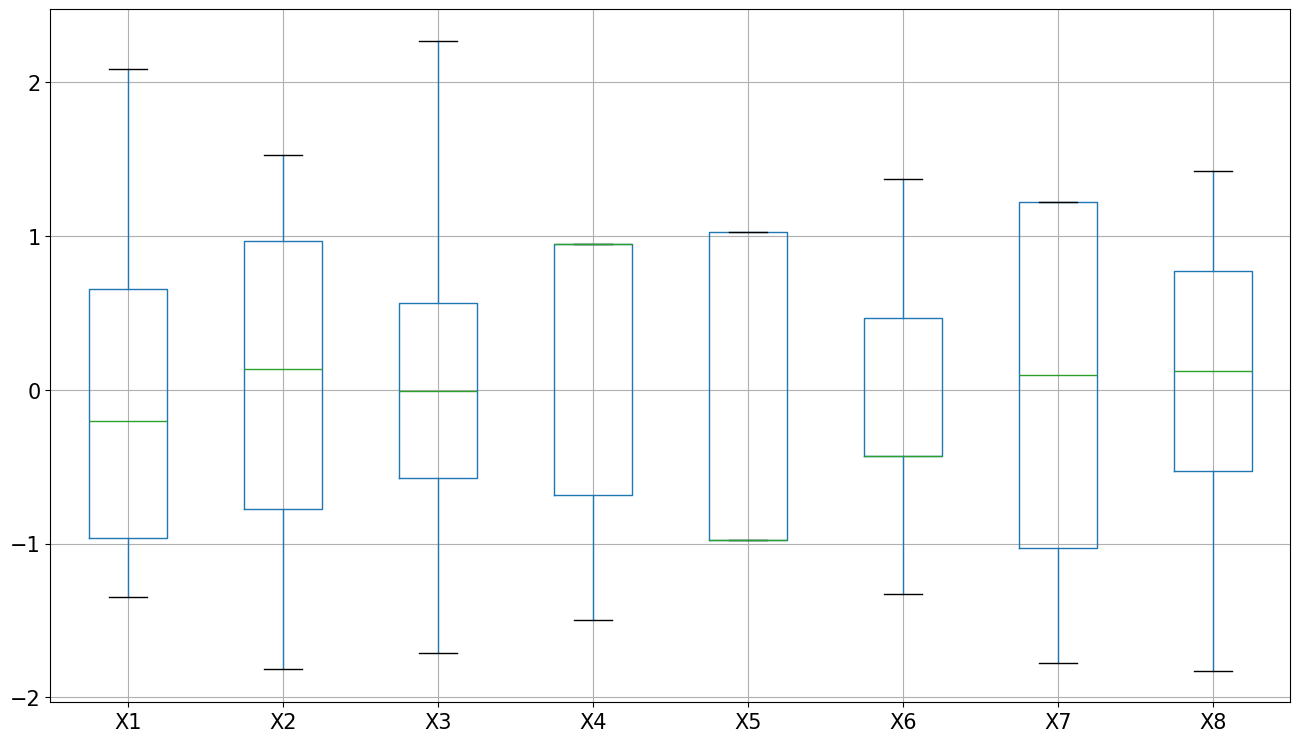

In [50]:
import matplotlib.pyplot as plt  

X_train_scaled.boxplot()  

plt.show()

In [51]:
from sklearn.neighbors import KNeighborsRegressor

model=KNeighborsRegressor(n_neighbors=2)

model.fit(X_train_scaled,y_train)

model.predict(X_test_scaled)[:10]

array([15.29 , 10.455, 36.3  , 16.695, 32.54 , 28.94 , 28.485, 28.945,
       28.915, 30.615])

In [52]:
y_test.values[:10]

array([15.18, 10.32, 37.26, 16.95, 32.26, 27.9 , 28.18, 28.95, 29.07,
       23.8 ])

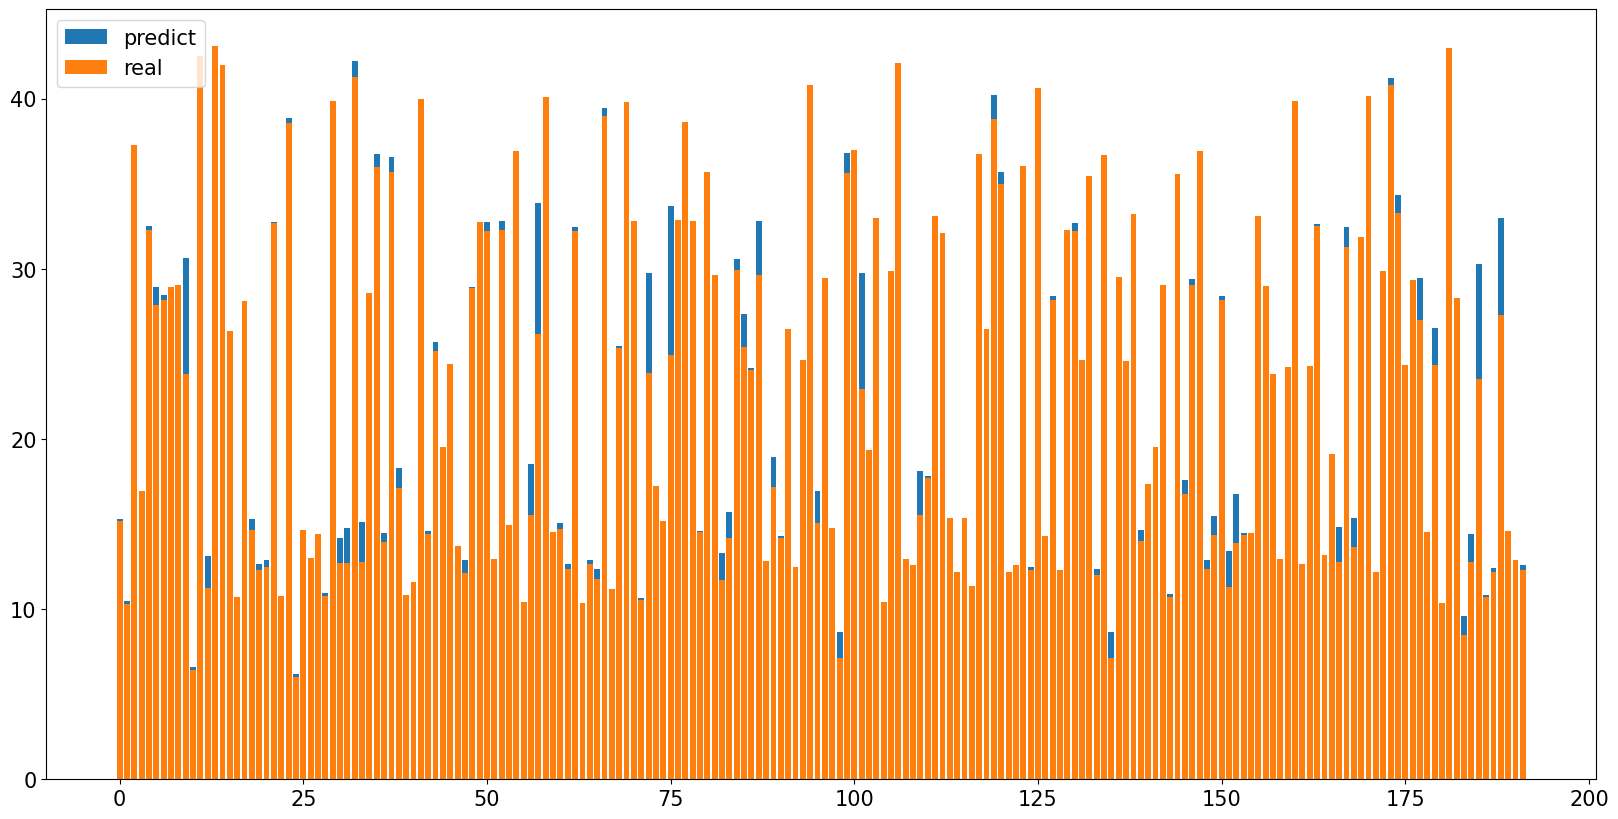

In [54]:
plt.figure(figsize=(20,10))
plt.bar(range(len(y_test)), model.predict(X_test_scaled), label='predict')  
plt.bar(range(len(y_test)), y_test.values, label='real')  
plt.legend()  
plt.show()

In [55]:
#score() 함수의 결과값 - R Squared

model.score(X_test_scaled,y_test)

0.9488237490773516

In [56]:
from sklearn.metrics import mean_squared_error  

print(mean_squared_error(y_test, model.predict(X_test_scaled)))  

print(mean_squared_error(y_test, model.predict(X_test_scaled))**0.5) # rmse

5.527708333333334
2.3511078948728263


In [57]:
#교차검증

import pandas as pd

df = pd.read_csv("c:/data/iris/iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [58]:
X=df[df.columns[0:4]]

y=df['Species']

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)

print(model.score(X_train,y_train))

print(model.score(X_test,y_test))

1.0
0.9666666666666667


In [ ]:
weights :default = 'uniform', 예측에 사용되는 가중치 함수

    #'uniform' : 균일한 가중치, 각 이웃의 모든 포인트는 동일하게 가중치가 부여됨

    #'distance' : 거리의 역수로 가중치 부여, 가까운 이웃에게 더 큰 가중치 부여

algorithm {'auto', 'ball_tree', 'kd_tree', 'brute'},

   # 최근접 이웃을 계산하는 알고리즘

   # 'ball_tree': BallTree 알고리즘

   # 'kd_tree': KDTree 알고리즘

    #'brute' : 무차별 검색(샘플수가 적을 경우에 설정되는 옵션)
   # 'auto' : 최적의 방법으로 자동 설정

leaf_size, default = 30

  #  BallTree 또는 KDTree 알고리즘을 사용하는 경우 전달되는 값

p (default = 2)

    p = 1 manhattan_distance

    p = 2 euclidean_distance

metrics - p와 같은 값(문자열)

metric_params : 메트릭 함수에 대한 추가 매개변수

n_jobs : 이웃 검색을 위해 실행할 병렬 작업 수, -1 : 모든 프로세서 사용


In [61]:
#하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {

    'n_neighbors': list(range(1,11)),

    'algorithm': ['ball_tree','kd_tree'],

    'weights': ['uniform','distance'],

    'p': [1,2]

}

gcv = GridSearchCV(model, params, cv=3)

gcv.fit(X, y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [62]:
gcv.cv_results_["params"][:5]

[{'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 2, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}]

In [63]:
scores=gcv.cv_results_["mean_test_score"]

scores

array([0.96      , 0.96      , 0.96      , 0.96      , 0.92      ,
       0.96      , 0.94666667, 0.96      , 0.96666667, 0.96666667,
       0.97333333, 0.97333333, 0.96      , 0.96666667, 0.98666667,
       0.97333333, 0.96      , 0.96      , 0.98      , 0.97333333,
       0.95333333, 0.96      , 0.97333333, 0.98666667, 0.96666667,
       0.96      , 0.97333333, 0.98      , 0.96      , 0.96      ,
       0.96666667, 0.98666667, 0.96666667, 0.96      , 0.97333333,
       0.97333333, 0.96666667, 0.96666667, 0.96666667, 0.98666667,
       0.96      , 0.96      , 0.96      , 0.96      , 0.92      ,
       0.96      , 0.94666667, 0.96      , 0.96666667, 0.96666667,
       0.97333333, 0.97333333, 0.96      , 0.96666667, 0.98666667,
       0.97333333, 0.96      , 0.96      , 0.98      , 0.97333333,
       0.95333333, 0.96      , 0.97333333, 0.98666667, 0.96666667,
       0.96      , 0.97333333, 0.98      , 0.96      , 0.96      ,
       0.96666667, 0.98666667, 0.96666667, 0.96      , 0.97333

0.9866666666666667


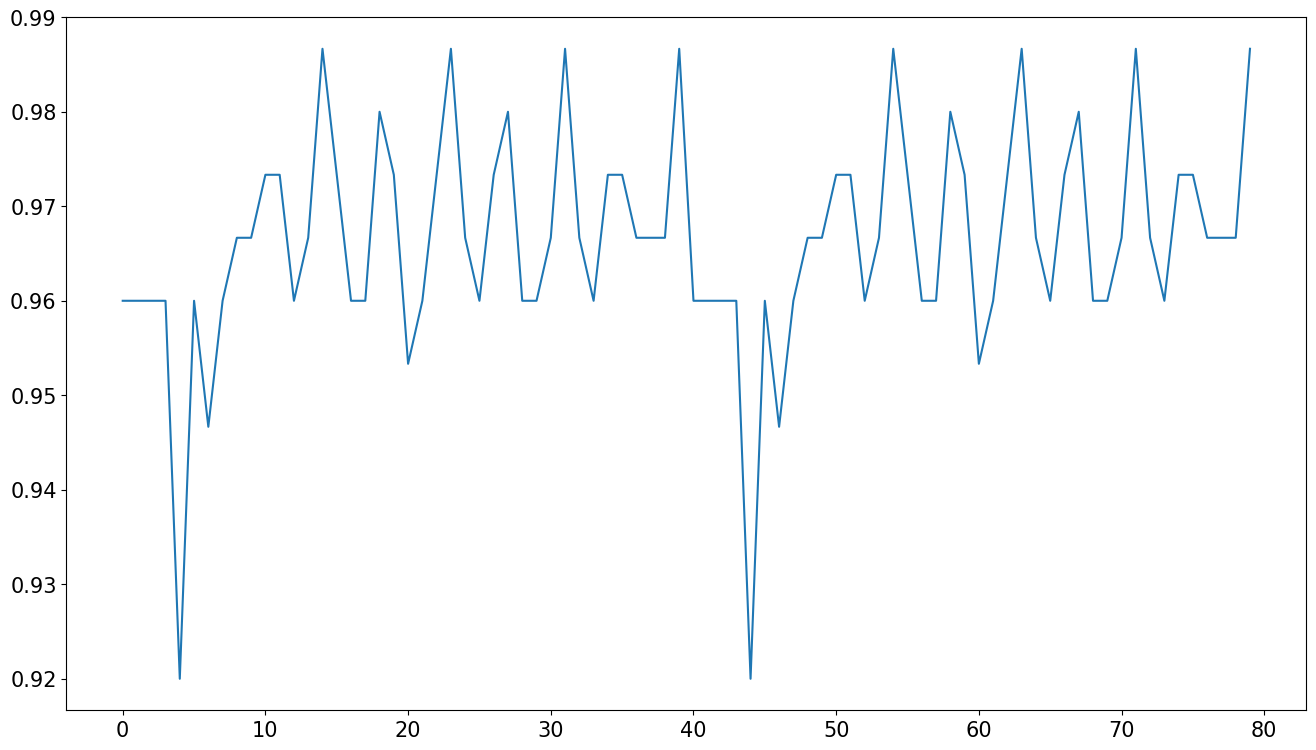

In [64]:
import matplotlib.pyplot as plt

print(max(scores))
plt.plot(scores)

In [65]:
#최고 정확도

print(gcv.best_score_)

#최적의 파라미터

print(gcv.best_params_)

#최적의 모형

print(gcv.best_estimator_)

0.9866666666666667
{'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=4)


In [66]:
#최적의 파라미터를 적용한 모형

from sklearn.model_selection import cross_val_score

import numpy as np

model = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6, p=2, weights='distance')

result=cross_val_score(model, X, y, cv=10)

#교차검증 결과

print(result)

#교차검증 평균값

print(np.mean(result))

#교차검증 최대값

print(np.max(result))

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668
1.0


In [21]:
#모형의 최적화
# validation_curve : 단일 하이퍼 파라미터 최적화
# GridSearchCV : 그리드를 사용한 복수 하이퍼 파라미터 최적화

import pandas as pd

df = pd.read_csv("c:/data/soccer/player.csv")
df.head()

,id,player_name,birthday,preferred_foot,age,height,weight,potential,right_foot,left_foot,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,overall_rating,Label
0,1,Aaron Appindangoye,1992-02-29,right,27,183,187,71,1,0,...,65,69,69,6,11,10,8,8,67,0
1,2,Aaron Cresswell,1989-12-15,right,30,170,146,71,1,0,...,65,69,69,6,11,10,8,8,67,0
2,3,Aaron Doran,1991-05-13,right,28,170,163,66,1,0,...,65,66,69,6,11,10,8,8,62,0
3,4,Aaron Galindo,1982-05-08,right,37,183,198,65,1,0,...,62,63,66,5,10,9,7,7,61,0
4,5,Aaron Hughes,1979-11-08,right,40,183,154,65,1,0,...,62,63,66,5,10,9,7,7,61,0


In [22]:
train_cols = df.columns[4:43]

print(train_cols)

X = df[train_cols] # 독립변수
y = df["Label"] # 종속변수

y.value_counts()

Index(['age', 'height', 'weight', 'potential', 'right_foot', 'left_foot',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')


Label
1    5705
0    5230
Name: count, dtype: int64

In [23]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample,y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Label'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp.Label.value_counts()

Label
0    5230
1    5230
Name: count, dtype: int64

In [24]:
X = df_samp[train_cols] # 독립변수
y = df_samp["Label"] # 종속변수

In [ ]:
# validation_curve() : 1개의 파라미터를 튜닝하는 함수
# param_name 최적화할 파라미터 이름
# param_range 범위
# scoring 성능 측정 기준
# 단순한 모형인 경우에는 적합하지만 튜닝할 파라미터가 많은 모형에는 적합하지 않은 방법

In [25]:
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC

param_range = [0.01, 0.1, 1, 10]

# C : cost, 오차에 대한 패널티
train_scores, test_scores = validation_curve( SVC(), X, y, param_name="C", param_range=param_range, cv=2, scoring="accuracy", n_jobs=-1)

In [26]:
print(train_scores)
print(test_scores)

[[0.81491396 0.83518164]
 [0.88489484 0.90210325]
 [0.92810707 0.9418738 ]
 [0.95391969 0.96099426]]
[[0.84225621 0.79407266]
 [0.90095602 0.8709369 ]
 [0.92887189 0.91108987]
 [0.94034417 0.92160612]]


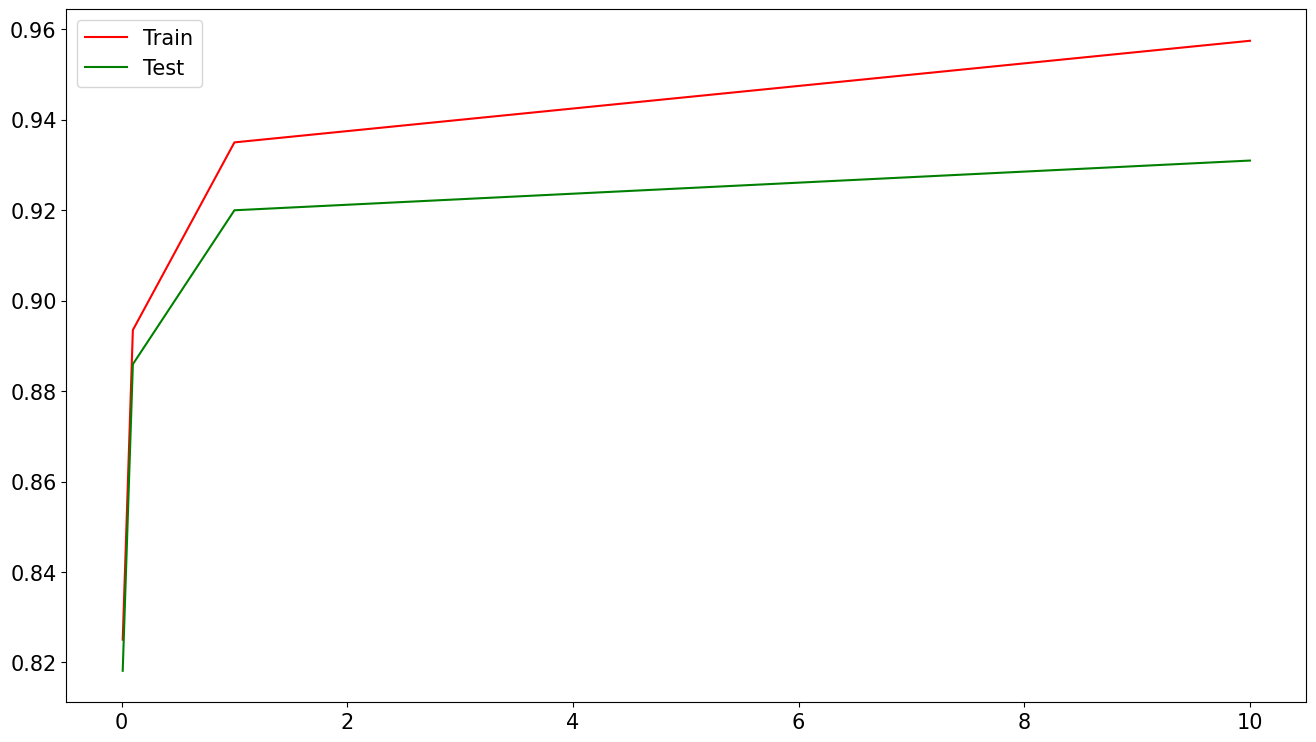

In [27]:
import matplotlib.pyplot as plt
import numpy as np

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.rcParams['figure.figsize']=(16,9)
plt.plot(param_range, train_scores_mean, label="Train", color="r")
plt.plot(param_range, test_scores_mean, label="Test", color="g")
plt.legend(loc="best")
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([('scl', StandardScaler()), ('clf', KNeighborsClassifier())])

param_grid = [
    {'clf__weights': ['uniform','distance'],
     #가중치          #균등       #차등
     'clf__p': [1,2],
     'clf__n_neighbors': list(range(2,6))
    }
]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
                  #분류모형        옵션
gs.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'clf__n_neighbors': [2, 3, 4, 5], 'clf__p': [1, 2],
                          'clf__weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [29]:
gs.cv_results_["params"]

[{'clf__n_neighbors': 2, 'clf__p': 1, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 2, 'clf__p': 1, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 2, 'clf__p': 2, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 2, 'clf__p': 2, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 3, 'clf__p': 1, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 3, 'clf__p': 1, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 3, 'clf__p': 2, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 3, 'clf__p': 2, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 4, 'clf__p': 1, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 4, 'clf__p': 1, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 4, 'clf__p': 2, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 4, 'clf__p': 2, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 5, 'clf__p': 1, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 5, 'clf__p': 1, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 5, 'clf__p': 2, 'clf__weights': 'uniform'},
 {'

In [30]:
gs.cv_results_["mean_test_score"]

array([0.85955909, 0.8288693 , 0.86615609, 0.84244523, 0.85353598,
       0.85162376, 0.86338307, 0.86347863, 0.86969312, 0.85162355,
       0.87447335, 0.8627138 , 0.86596455, 0.86405225, 0.87189193,
       0.87131831])

In [31]:
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

0.8744733532844969
{'clf__n_neighbors': 4, 'clf__p': 2, 'clf__weights': 'uniform'}
Pipeline(steps=[('scl', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=4))])


In [32]:
from sklearn.model_selection import cross_val_score

p=Pipeline([('scl', StandardScaler()),
            ('clf', KNeighborsClassifier(n_neighbors=4, p=2, weights='uniform'))])

result=cross_val_score(p, X, y, cv=10)

#교차검증 결과
print(result)

#교차검증 평균값
print(np.mean(result))

#교차검증 최대값
print(np.max(result))

[0.83556405 0.92734226 0.86998088 0.90057361 0.90344168 0.85181644
 0.85372849 0.87858509 0.86806883 0.87380497]
0.8762906309751435
0.9273422562141491
